## 1. Why we need Polynomial Regression?

[Linear Regresspion](https://www.kaggle.com/code/lxlz1986/linear-regression-model-in-scikit-learn) is a simple model to make predictions if the relationship between target and features in a dataset is linear or close to linear. 

However, most of the time, our data is much more complex that it is not sufficient to represent the relationship just using a straight line. In the cases with **non-linear** data, we can try to use polynomial to simulate the relationship between the output(prediction) and input(features), such as:

$$\hat{y} = \theta_0 + \theta_1x +\theta_2x^2$$

where $\hat{y}$ is the prediction, $x$ is the original feature and $x^2$ is the extended feature, which is the square of the original feature.

From the mathematical aspect, we can take this polynomial equation as a liner model in which $x$ and $x^2$ are two features of a data point. This makes it possible that we can train a linear model to fit the non-linear data. This method to make predictions is called **polynomial regression**.

## 2. How to train Polynomial Regression model using Linear Regression model?

As mentioned above, we can train a liner model to fit non-liner data by extend the single feature to multiple features.  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Generating non-linear dataset based on 2-degree polynomial 

In [2]:
n = 100
X = 6 * np.random.rand(n,1)-4
y = X**2 + 2 * X + 3 + np.random.rand(n,1)

### Plotting the dataset

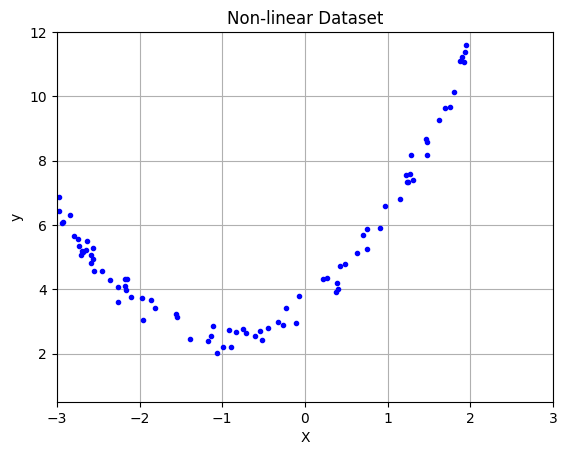

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.axis([-3,3,0.5,12])
plt.grid(True)


### Transforming dataset to have polynomial features
Adding square of each feature as new features

In [4]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_ploy = poly_features.fit_transform(X)
print(X[0])
print(X_ploy[0])

[-3.8856858]
[-3.8856858  15.09855412]


### Using new polynomial features to train the Linear Regression model

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.49371614]), array([[1.99088233, 1.00308178]]))

### Using the trained Linear Regression model to make predictions

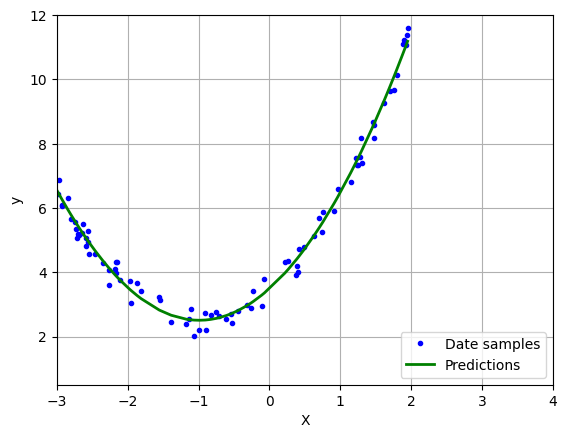

In [6]:
X_new = np.sort(X,axis = 0) 
X_new_ploy = poly_features.fit_transform(X_new)
y_predict = lin_reg.predict(X_new_ploy)
fig,ax = plt.subplots()
ax.plot(X,y,'b.', label = 'Date samples')
ax.plot(X_new,y_predict,'g',linewidth=2, label = 'Predictions')
ax.axis([-3,4,0.5,12])
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)